# Support Vector Machine
In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.
### -> SVM is a classification algorithm where we have a margin dividing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# churn = pd.read_csv('churn_data.csv')
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
churn.shape

(7043, 21)

In [8]:
new_churn = churn.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis = 1)

In [9]:
new_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
new_churn.shape

(7043, 9)

In [12]:
new_churn.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
new_churn.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


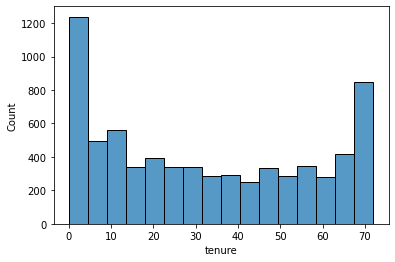

In [16]:
sns.histplot(new_churn['tenure'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


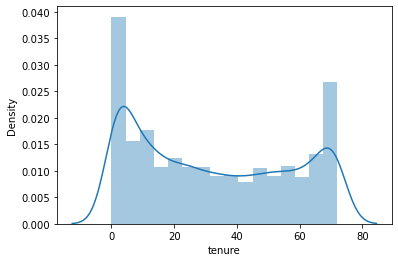

In [15]:
sns.distplot(new_churn['tenure'])
plt.show()

In [17]:
new_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [19]:
p_keys = new_churn['PaperlessBilling'].value_counts().keys()
p_values = new_churn['PaperlessBilling'].value_counts().values

print(p_keys)
print(p_values)

Index(['Yes', 'No'], dtype='object')
[4171 2872]


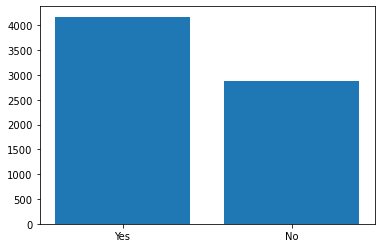

In [20]:
plt.bar(p_keys, p_values)
plt.show()

In [21]:
new_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
new_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [23]:
pp_keys = new_churn['PaymentMethod'].value_counts().keys()
pp_values = new_churn['PaymentMethod'].value_counts().values

print(pp_keys)
print(pp_values)

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object')
[2365 1612 1544 1522]


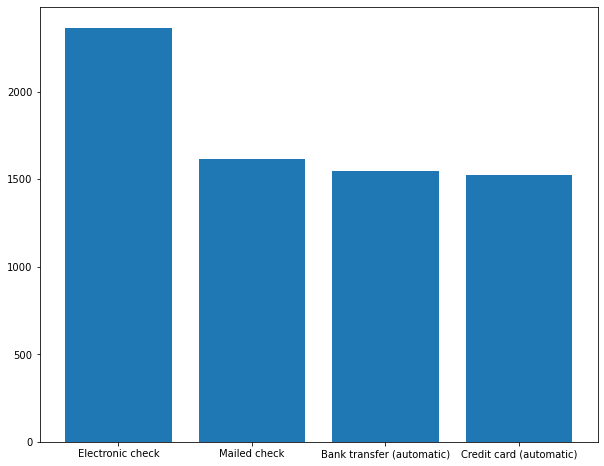

In [25]:
plt.figure(figsize= (10, 8))
plt.bar(pp_keys, pp_values)
plt.show()

In [29]:
new_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
new_churn['Contract'].value_counts() 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [27]:
c_keys = new_churn['Contract'].value_counts().keys()
c_values = new_churn['Contract'].value_counts().values

print(c_keys)
print(c_values)

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')
[3875 1695 1473]


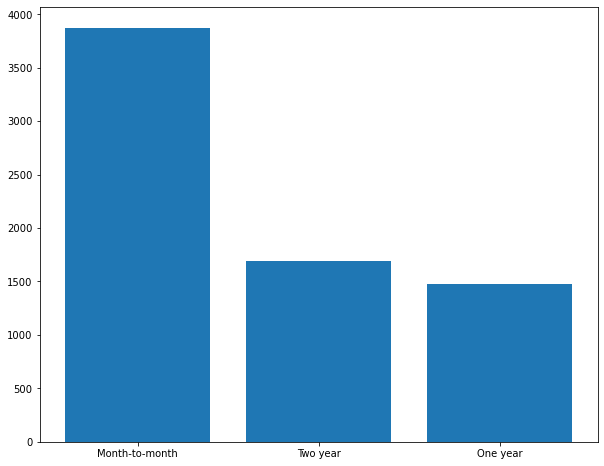

In [28]:
plt.figure(figsize= (10, 8))
plt.bar(c_keys, c_values)
plt.show()

In [30]:
new_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [31]:
x = new_churn[['tenure']]
y = new_churn[['Churn']]

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC()

In [37]:
svc.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [38]:
y_pred = svc.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, y_pred)

array([[1155,  143],
       [ 289,  174]])

In [44]:
(1155 + 173) / (1155 + 173 + 289 + 143)

0.7545454545454545